# Deep Learning Models - Top 6 Features (Longitude, Elevation, Minimum/Maximum/Average Temperatures, Precipitation)

In [1]:
# Importing libraries and packages to use for deep learning
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import matplotlib.pyplot as plt

In [2]:
# Reading in dataframes
Final_df = pd.read_csv('./Clean_dataframe/clean_df.csv')

In [3]:
# Reading in columns
Final_df.columns

Index(['Unnamed: 0', 'time_decimal', 'value', 'value_std_dev', 'nvalue',
       'latitude', 'longitude', 'altitude', 'elevation', 'intake_height',
       'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'ACMH', 'ACSH', 'AWND',
       'DAPR', 'DASF', 'FMTM', 'MDPR', 'MDSF', 'PGTM', 'PRCP', 'PSUN', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'TSUN', 'WDF1', 'WDF2', 'WDF5',
       'WDFG', 'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22', 'WV01',
       'WV03', 'WV07', 'WV18', 'WV20', 'year_month_day', 'sea_level'],
      dtype='object')

In [4]:
# Filtering for top 6 features
features = ['LONGITUDE', 'ELEVATION','TMIN', 'TMAX' ,'PRCP','TAVG']
X = Final_df[features]
y = Final_df['sea_level']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [5]:
# Scaling variables
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [6]:
# Neural Network

# construct network
model = Sequential()

# first layer
model.add(Dense(32, input_shape=(6,), activation='relu'))

# second layer
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(1))

In [7]:
# Compiling model with loss function MSE
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [8]:
# Fitting model
model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=10, batch_size=512);

Epoch 1/10
139/139 [==============================] - 1s 1ms/step - loss: 7959514.5000 - mae: 2633.8748 - val_loss: 7920909.0000 - val_mae: 2625.3882
Epoch 2/10
139/139 [==============================] - 0s 800us/step - loss: 7701887.5000 - mae: 2586.9583 - val_loss: 7388838.0000 - val_mae: 2528.3298
Epoch 3/10
139/139 [==============================] - 0s 775us/step - loss: 6748278.5000 - mae: 2407.4512 - val_loss: 5972986.5000 - val_mae: 2251.9802
Epoch 4/10
139/139 [==============================] - 0s 770us/step - loss: 4987261.0000 - mae: 2036.3933 - val_loss: 3985396.0000 - val_mae: 1798.4106
Epoch 5/10
139/139 [==============================] - 0s 783us/step - loss: 3112272.5000 - mae: 1559.2753 - val_loss: 2385775.7500 - val_mae: 1337.4166
Epoch 6/10
139/139 [==============================] - 0s 790us/step - loss: 1917169.6250 - mae: 1163.8494 - val_loss: 1590481.2500 - val_mae: 1025.8682
Epoch 7/10
139/139 [==============================] - 0s 864us/step - loss: 1364951.5000 -

In [9]:
# Predictions
test_preds = model.predict(X_test_sc)

In [10]:
# RMSE
print(f'RMSE on base neural network model: {mean_squared_error(y_test, test_preds, squared = False)}')

RMSE on base neural network model: 830.6189120511758


In [11]:
# Evaluating model with validation data
model.evaluate(X_test_sc, y_test, batch_size=512)

47/47 [==============================] - 0s 451us/step - loss: 689927.8125 - mae: 564.9240


[689927.8125, 564.9240112304688]

In [12]:
# Check the R-squared
metrics.r2_score(y_test, test_preds)

0.33055759362671944

In [13]:
# Checking RMSE score
mean_squared_error(y_test, test_preds, squared = False)

830.6189120511758

## GridSearch

In [14]:
# Similar to what was done in lecture, doing a grid search for the best features

def model_fn_adv(hidden_neurons = 32, hidden_layers = 5, dropout = 0.5):
    # build framework of model using for loop and if statement
    model = Sequential()
    
    # adding number of layers = specified in calling of function
    for layer in range(hidden_layers):
        if layer == 0:
            model.add(Dense(hidden_neurons, activation = 'relu', input_shape = (6,)))
            model.add(Dropout(dropout))
        else:
            model.add(Dense(hidden_neurons, activation = 'relu'))
            model.add(Dropout(dropout))
    
    # out put layer added here, Identity link function used as 'None'
    model.add(Dense(1, activation = None))

    # using mse as the metric to solve for 
    model.compile(loss = 'mse', optimizer = 'adam')
    
    return model

In [15]:
# Model setup
nn = KerasRegressor(build_fn = model_fn_adv, batch_size = 512, verbose = 1)

In [16]:
# Parameters
nn_params_deep = {
    'hidden_neurons' : [20, 32, 64],
    'hidden_layers'  : [2, 3, 5],
    'dropout'        : [0.1, 0.2, 0.3, 0.4, 0.5],
    'epochs'         : [10, 20, 30, 40, 50]
}

In [17]:
# Initializing gridsearchCV
gs = GridSearchCV(nn, param_grid = nn_params_deep, cv = 5, verbose = 1)

In [18]:
# Fitting - WARNING: This took us approximately 2.5 hours. Please do not run
# This was an extremely robust calculation, which we ultimately found was not as strong of a model as the Random Forest model, which took a fraction of the time spent to run
gs.fit(X_train_sc, y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits
Epoch 1/10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


111/111 [==============================] - 0s 716us/step - loss: 7970434.5000
Epoch 2/10
111/111 [==============================] - 0s 655us/step - loss: 7853306.5000
Epoch 3/10
111/111 [==============================] - 0s 661us/step - loss: 7438267.5000
Epoch 4/10
111/111 [==============================] - 0s 659us/step - loss: 6555077.5000
Epoch 5/10
111/111 [==============================] - 0s 664us/step - loss: 5245246.5000
Epoch 6/10
111/111 [==============================] - 0s 664us/step - loss: 3830384.7500
Epoch 7/10
111/111 [==============================] - 0s 665us/step - loss: 2680105.5000
Epoch 8/10
111/111 [==============================] - 0s 661us/step - loss: 1970481.0000
Epoch 9/10
111/111 [==============================] - 0s 658us/step - loss: 1571202.0000
Epoch 10/10
28/28 [==============================] - 0s 441us/step - loss: 1131889.5000
Epoch 1/10
111/111 [==============================] - 0s 706us/step - loss: 7962927.0000
Epoch 2/10
111/111 [=============

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



111/111 [==============================] - 0s 3ms/step - loss: 297306.7500
Epoch 21/50
111/111 [==============================] - 0s 3ms/step - loss: 296003.9062
Epoch 22/50
111/111 [==============================] - 0s 3ms/step - loss: 291787.1562
Epoch 23/50
111/111 [==============================] - 0s 3ms/step - loss: 287337.3125
Epoch 24/50
111/111 [==============================] - 0s 3ms/step - loss: 286858.8750
Epoch 25/50
111/111 [==============================] - 0s 3ms/step - loss: 284481.5000
Epoch 26/50
111/111 [==============================] - 0s 3ms/step - loss: 280702.5312
Epoch 27/50
111/111 [==============================] - 0s 3ms/step - loss: 281483.0000
Epoch 28/50
111/111 [==============================] - 0s 3ms/step - loss: 279228.2188
Epoch 29/50
111/111 [==============================] - 0s 3ms/step - loss: 271600.2188
Epoch 30/50
111/111 [==============================] - 0s 3ms/step - loss: 271380.4688
Epoch 31/50
111/111 [==============================] - 

GridSearchCV(cv=5,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f7f9a9263d0>,
             param_grid={'dropout': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'epochs': [10, 20, 30, 40, 50],
                         'hidden_layers': [2, 3, 5],
                         'hidden_neurons': [20, 32, 64]},
             verbose=1)

In [19]:
# Best parameters
gs.best_params_

{'dropout': 0.1, 'epochs': 50, 'hidden_layers': 3, 'hidden_neurons': 64}

In [20]:
# Best score
gs.best_score_

-39350.5046875

In [21]:
# Make predictions 
preds = gs.predict(X_test_sc)

47/47 [==============================] - 0s 977us/step


In [22]:
# Check the R-squared
metrics.r2_score(y_test, preds)

0.9632379393231948

In [23]:
# Checking RMSE score
mean_squared_error(y_test, preds, squared = False)

194.6458412454534

## Recurrent Neural Networks

In [24]:
# Because we are dealing with a time series data, we attmepted using recurrent neural networks.
# However, because of the disparity in the time data accumulated between each weather station, and the fact that we'd only be able to model one weather station at a time, 
# we eventually opted to forfeit pursuing this model further for the current purpose of this project.

features = ['LONGITUDE', 'ELEVATION','TMIN', 'TMAX' ,'PRCP','TAVG']
X = Final_df[features]
y = Final_df[['sea_level']].values

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, shuffle = False)

In [25]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [26]:
train_sequences = TimeseriesGenerator(X_train_sc, y_train, length=40, batch_size=64)

In [27]:
test_sequences = TimeseriesGenerator(X_test_sc, y_test, length=40, batch_size=64)

In [28]:
test_sequences[0][0].shape

(64, 40, 6)

In [29]:
train_sequences[0][0].shape

(64, 40, 6)

In [30]:
input_shape = train_sequences[0][0][0].shape

In [31]:
model = Sequential()
model.add(GRU(8, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
model.add(GRU(8, return_sequences=False)) # False if next layer is Dense

model.add(Dense(4, activation='relu'))

model.add(Dense(1))

In [32]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_sequences, validation_data=test_sequences, epochs=50, verbose=1)

Epoch 1/50
1109/1109 [==============================] - 34s 28ms/step - loss: 8087256.0000 - mae: 2662.2668 - val_loss: 6923430.0000 - val_mae: 2419.1641
Epoch 2/50
1109/1109 [==============================] - 32s 29ms/step - loss: 7516662.5000 - mae: 2552.5764 - val_loss: 6233432.5000 - val_mae: 2272.1816
Epoch 3/50
1109/1109 [==============================] - 33s 30ms/step - loss: 6641805.0000 - mae: 2374.6746 - val_loss: 5339897.5000 - val_mae: 2066.5684
Epoch 4/50
1109/1109 [==============================] - 28s 25ms/step - loss: 5606455.5000 - mae: 2145.5671 - val_loss: 4364763.5000 - val_mae: 1816.5065
Epoch 5/50
1109/1109 [==============================] - 33s 30ms/step - loss: 4521985.5000 - mae: 1877.1687 - val_loss: 3403946.5000 - val_mae: 1532.9448
Epoch 6/50
1109/1109 [==============================] - 34s 31ms/step - loss: 3483243.2500 - mae: 1580.9088 - val_loss: 2542861.5000 - val_mae: 1235.9078
Epoch 7/50
1109/1109 [==============================] - 34s 31ms/step - loss

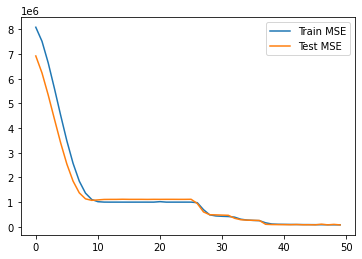

In [33]:
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Test MSE')
plt.legend();

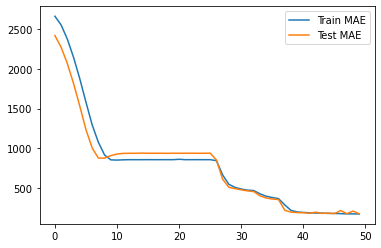

In [34]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.legend();

In [42]:
# Add early stopping
from tensorflow.keras.callbacks import EarlyStopping

model2 = Sequential()
model2.add(GRU(8, input_shape=input_shape, return_sequences=True)) # True if next layer is RNN
model2.add(GRU(8, return_sequences=False)) # False if next layer is Dense

model2.add(Dense(4, activation='relu'))

model2.add(Dense(1))

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

es = EarlyStopping(patience = 5)

history2 = model2.fit(train_sequences, validation_data=test_sequences, epochs=100, batch_size = 64, callbacks = [es])

Epoch 1/100
1109/1109 [==============================] - 35s 29ms/step - loss: 8146459.5000 - mae: 2673.3647 - val_loss: 7073468.0000 - val_mae: 2449.9690
Epoch 2/100
1109/1109 [==============================] - 35s 32ms/step - loss: 7842422.0000 - mae: 2615.9031 - val_loss: 6704168.5000 - val_mae: 2373.4299
Epoch 3/100
1109/1109 [==============================] - 33s 30ms/step - loss: 7365930.5000 - mae: 2523.1567 - val_loss: 6203624.0000 - val_mae: 2265.6162
Epoch 4/100
1109/1109 [==============================] - 33s 30ms/step - loss: 6771010.0000 - mae: 2402.0923 - val_loss: 5617541.5000 - val_mae: 2132.5469
Epoch 5/100
1109/1109 [==============================] - 34s 30ms/step - loss: 6096754.0000 - mae: 2257.5957 - val_loss: 4976940.0000 - val_mae: 1977.0924
Epoch 6/100
1109/1109 [==============================] - 32s 29ms/step - loss: 5375003.0000 - mae: 2091.8501 - val_loss: 4312142.5000 - val_mae: 1802.0592
Epoch 7/100
1109/1109 [==============================] - 36s 32ms/step

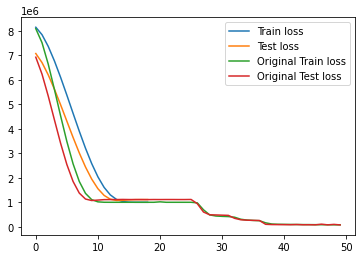

In [43]:
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test loss')
plt.plot(history.history['loss'], label='Original Train loss')
plt.plot(history.history['val_loss'], label='Original Test loss')
plt.legend();